In [130]:
import pandas as pd
import numpy as np


In [131]:
# The Boston Housing Dataset

# The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

# 1. CRIM      per capita crime rate by town
# 2. ZN        proportion of residential land zoned for lots over
#              25,000 sq.ft.
# 3. INDUS     proportion of non-retail business acres per town
# 4. CHAS      Charles River dummy variable (= 1 if tract bounds
#              river; 0 otherwise)
# 5. NOX       nitric oxides concentration (parts per 10 million)
# 6. RM        average number of rooms per dwelling
# 7. AGE       proportion of owner-occupied units built prior to 1940
# 8. DIS       weighted distances to five Boston employment centres
# 9. RAD       index of accessibility to radial highways
# 10. TAX      full-value property-tax rate per $10,000
# 11. PTRATIO  pupil-teacher ratio by town
# 12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
#              by town
# 13. LSTAT    % lower status of the population
# 14. MEDV     Median value of owner-occupied homes in $1000's

In [132]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [133]:
df.shape

(506, 14)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


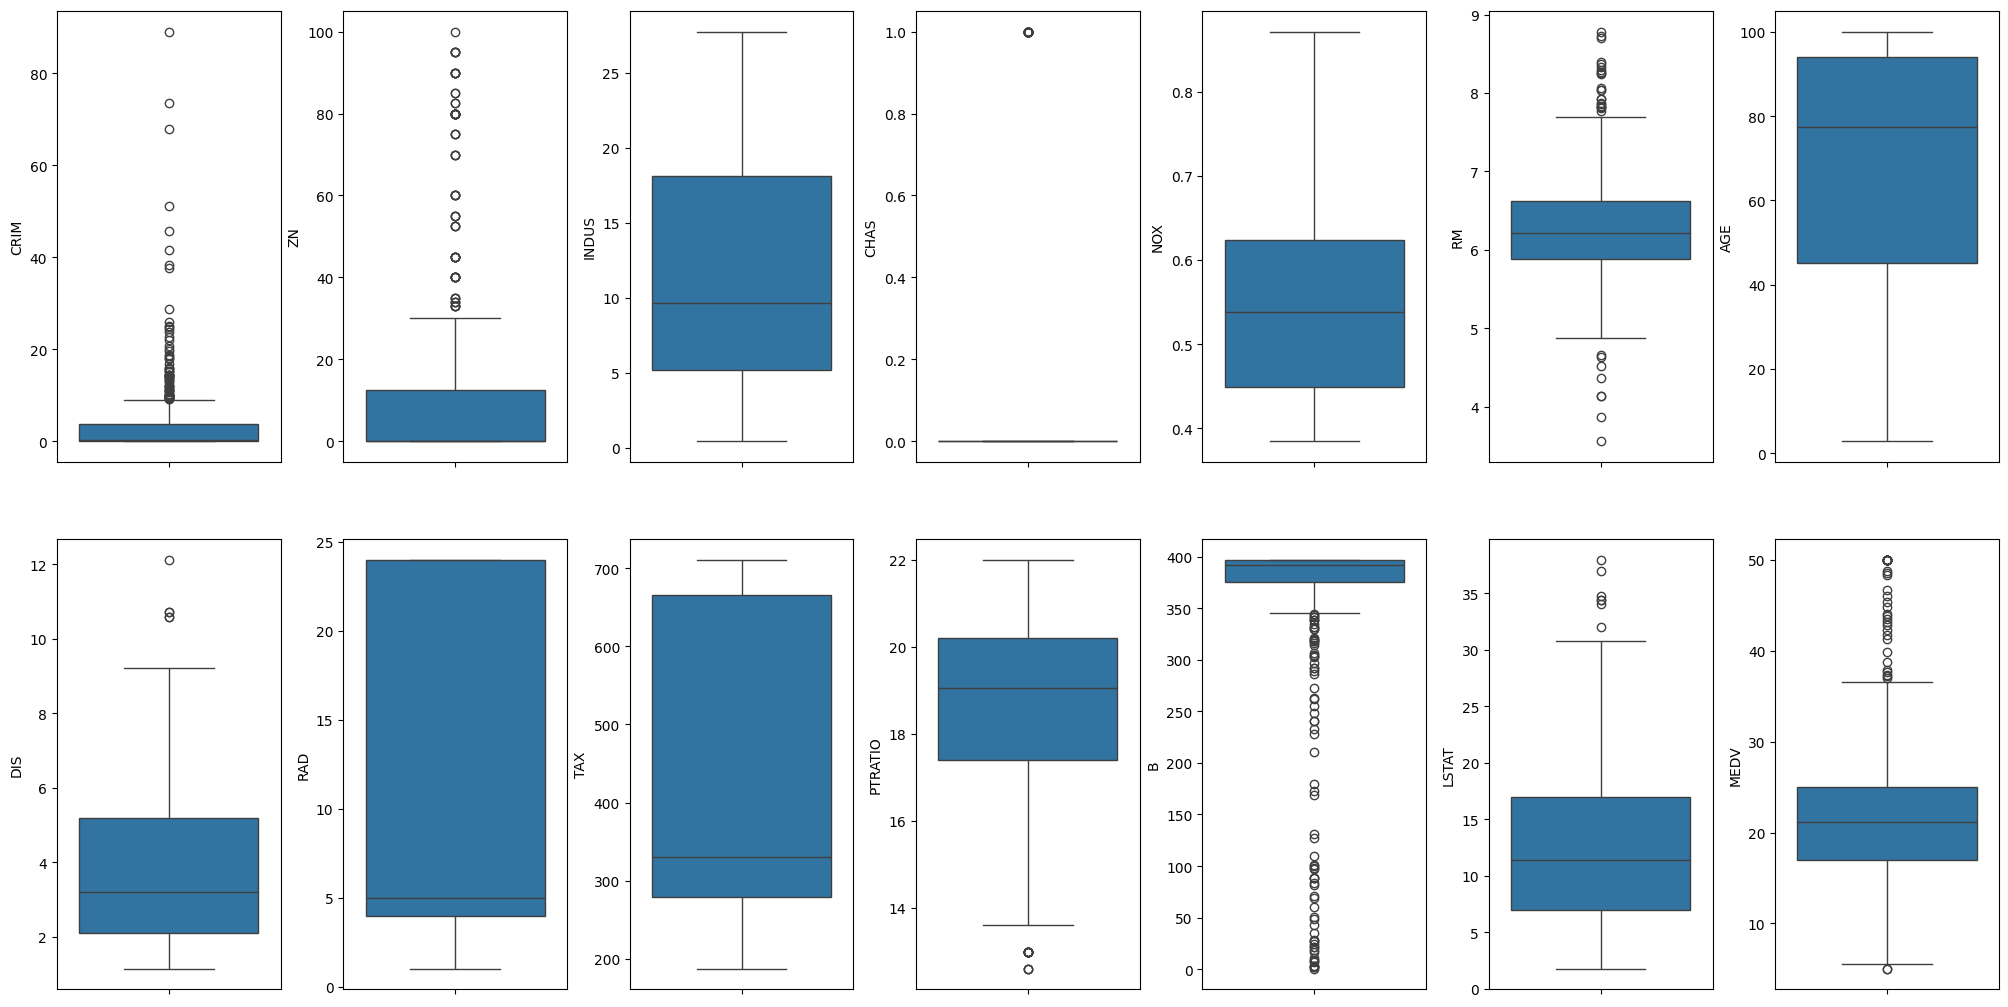

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [137]:
df[df['CRIM'] > 20]['CRIM'].count()

18

In [138]:
df['CRIM'] = df['CRIM'].clip(upper = 20)

<Axes: >

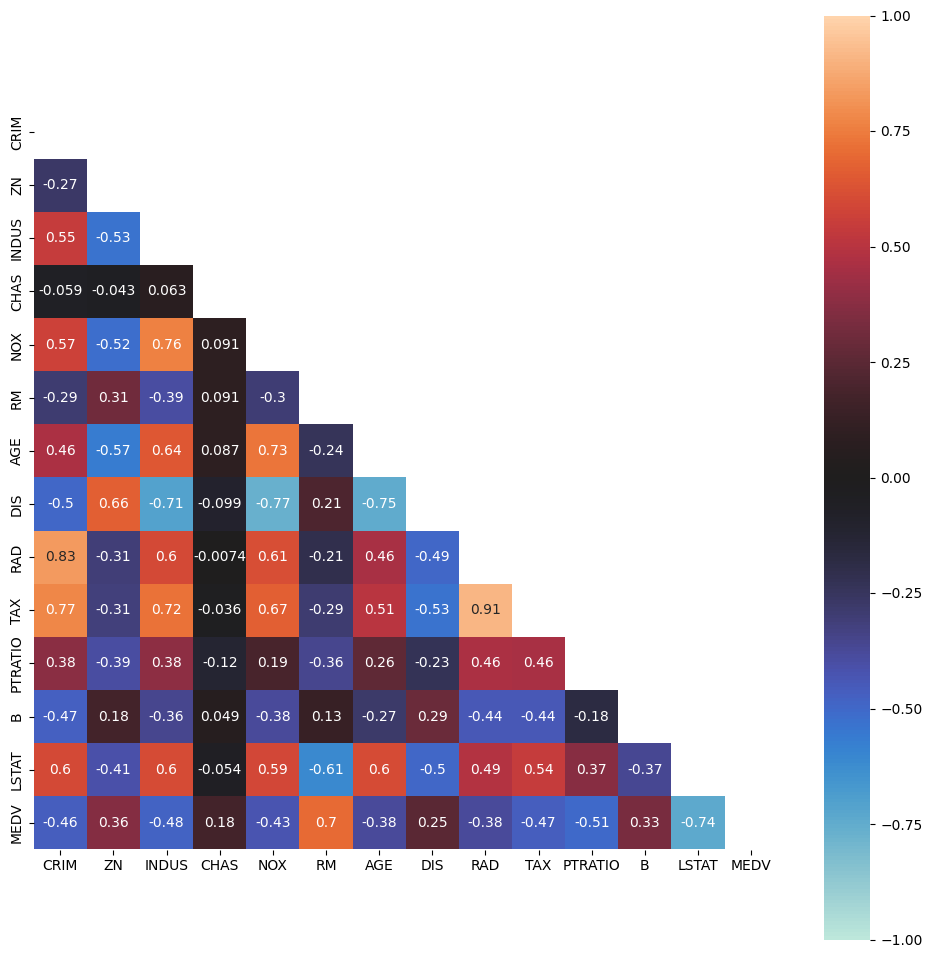

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12,12))
sns.heatmap(
    df.corr(),
    mask=np.triu(df.corr()),
    center=0,vmin=-1,vmax=1,square=True,annot=True
)

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from sklearn.metrics import  r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.metrics import r2_score


In [144]:
X = df.drop(columns = 'MEDV')
y = df.MEDV
cols = X.columns
cat_cols = ['CHAS']

# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
X = pd.get_dummies(
    X,
    columns = cat_cols,
    drop_first = True,
)

X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0


In [145]:
# prepare train and test data sets

X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)


# scale train and test data sets
# ONLY TRAIN PART GETS FIT_TRANSFORMED, TEST PART IS ONLY TRANSFORMED


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)



In [146]:
X_train.shape, x_test.shape, Y_train.shape

((379, 13), (127, 13), (379,))

In [191]:
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [192]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(256, activation='relu', input_shape=[13,]))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
# model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(128, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
# model_1.add(Dropout(0.2))
# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(128, activation='relu'))
# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))
# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA
model_1.add(Dense(1
                  ))


In [193]:
model_1.compile(optimizer='Adam',
              loss= keras.losses.mean_squared_error)

In [194]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 6

In [195]:
hist1 = model_1.fit(X_train, Y_train,
          batch_size=32,
          epochs=200,
          verbose=1,
          validation_split=0.1)

Epoch 1/200
11/11 [==============================] - 1s 21ms/step - loss: 562.5739 - val_loss: 425.1399
Epoch 2/200
11/11 [==============================] - 0s 7ms/step - loss: 274.6543 - val_loss: 56.5690
Epoch 3/200
11/11 [==============================] - 0s 8ms/step - loss: 90.7970 - val_loss: 34.5133
Epoch 4/200
11/11 [==============================] - 0s 7ms/step - loss: 42.6384 - val_loss: 25.4478
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 25.9270 - val_loss: 20.9826
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 23.0337 - val_loss: 17.0175
Epoch 7/200
11/11 [==============================] - 0s 6ms/step - loss: 18.6080 - val_loss: 15.7581
Epoch 8/200
11/11 [==============================] - 0s 7ms/step - loss: 16.5168 - val_loss: 14.6981
Epoch 9/200
11/11 [==============================] - 0s 7ms/step - loss: 16.3560 - val_loss: 13.9568
Epoch 10/200
11/11 [==============================] - 0s 8ms/step - loss: 15.8955 - val

In [196]:
model_1.evaluate(x_test, y_test)


4/4 [==============================] - 0s 4ms/step - loss: 15.6604


15.660350799560547

In [197]:
pred1 = model_1.predict(x_test)


4/4 [==============================] - 0s 4ms/step


In [198]:
print(f"R2 Score {r2_score(y_test,pred1)}")

R2 Score 0.8083165314916462


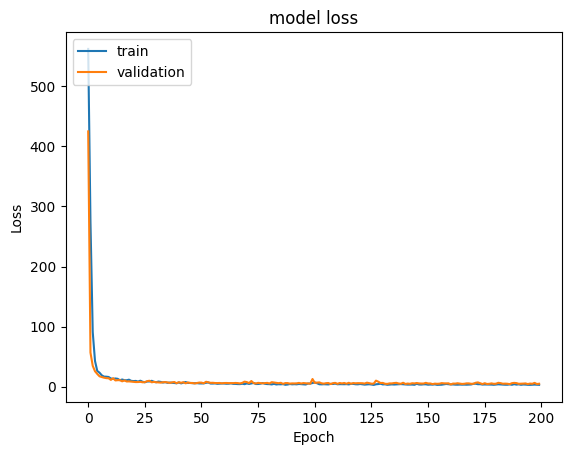

In [199]:
### Plotting Train Loss vs Validation Loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [200]:
predictions = pd.DataFrame(
    {
        'Actuals' : y_test.values,
        'Prediction' : pred1.reshape(-1,),

})

predictions['Resuidual'] = abs(predictions['Actuals'] - predictions['Prediction'])

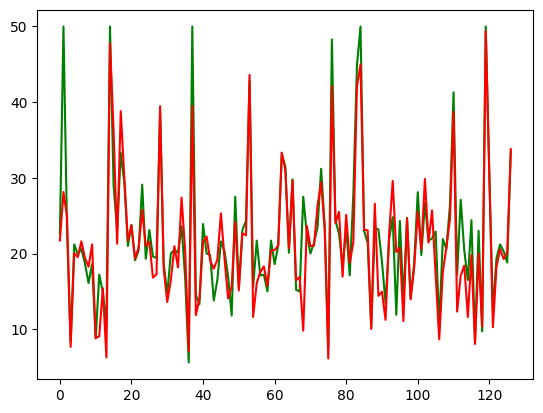

In [202]:
plt.plot(predictions['Actuals'], color = 'g', label = 'Actuals')
plt.plot(predictions['Prediction'], color = 'r', label = 'Prediction')
# plt.legend

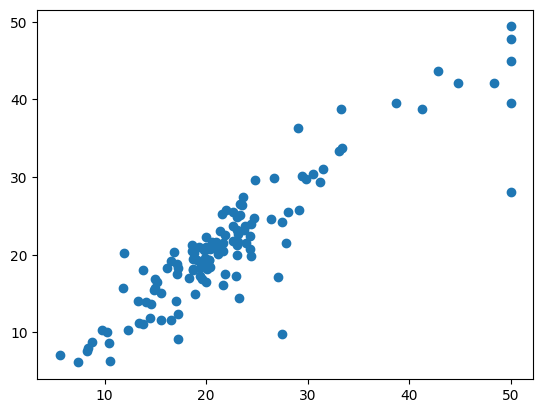

In [203]:
plt.scatter(predictions['Actuals'],predictions['Prediction'])

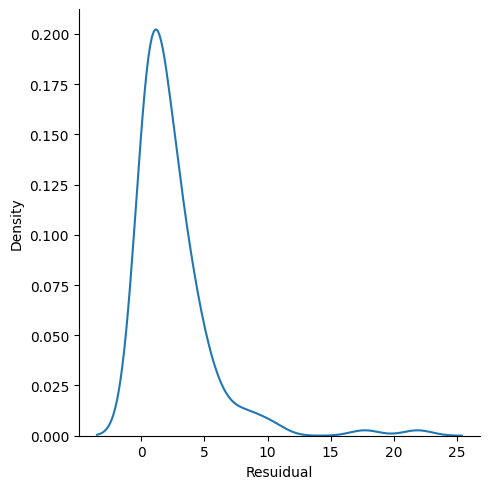

In [204]:
import seaborn as sns

sns.displot(predictions['Resuidual'], kind = 'kde')